In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [4]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df['LogPassengers'] = np.log(df['Passengers'])

In [6]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [7]:
import pmdarima as pm

In [8]:
model = pm.auto_arima(train['Passengers'],
                      trace=True,
                      suppress_warnings=True,
                      seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.15 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.15 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.07 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=1.18 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.15 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.65 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.10 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.22 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.07 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.20 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Tue, 14 Jun 2022   AIC                            905.686
Time:                                    18:59:35   BIC                            919.623
Sample:                                         0   HQIC                           911.346
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int = True)

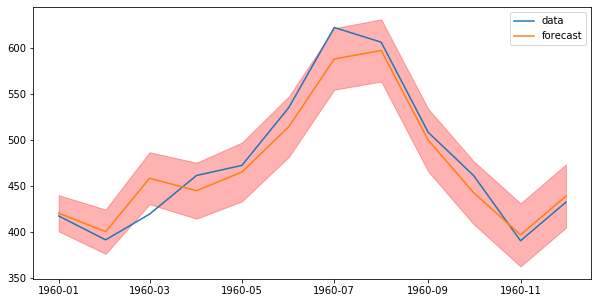

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(test.index, test['Passengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index,\
                confint[:,0],confint[:,1],\
                color='red',alpha=0.3)
ax.legend();

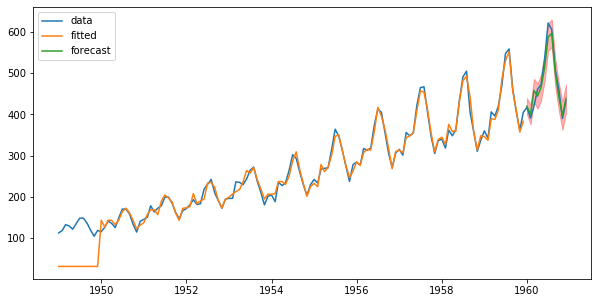

In [27]:
train_pred = model.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.index, df['Passengers'], label='data')
ax.plot(train.index, train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index,\
                confint[:,0],confint[:,1],\
                color='red',alpha=0.3)
ax.legend();

In [28]:
logmodel = pm.auto_arima(train['LogPassengers'],
                         trace=True,
                         suppress_warnings=True,
                         seasonal=True,
                         m=12)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-438.486, Time=1.32 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-317.949, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-433.027, Time=0.35 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-383.189, Time=0.30 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.983, Time=0.01 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-444.326, Time=0.66 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-414.782, Time=0.31 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-442.326, Time=1.80 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-436.714, Time=0.76 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=1.88 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-445.576, Time=0.57 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-414.732, Time=0.20 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-440.405, Time=0.75 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-443.535, Time=1.55 sec
 ARIMA(1,0,2)(1,1,0)[12]

In [29]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 229.026
Date:                              Tue, 14 Jun 2022   AIC                           -448.052
Time:                                      19:00:13   BIC                           -434.114
Sample:                                           0   HQIC                          -442.392
                                              - 132                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0192      0.009      2.150      0.032       0.002       0.037
ar.L1          0.6003      0.083      7.274      0.000       0.439       0.762
ar.L2          0.2420      0.085      2.858      0.004       0.076       0.408
ma.S.L12      -0.5669      0.105     -5.415      0.000      -0.772      -0.362
sigma2         0.0012      0.000      8.193      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.07
Prob(Q):                              1.00   Prob(JB):                         0.05
Heteroskedasticity (H):               0.36   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
test_pred_log, confint = logmodel.predict(n_periods=Ntest, return_conf_int = True)

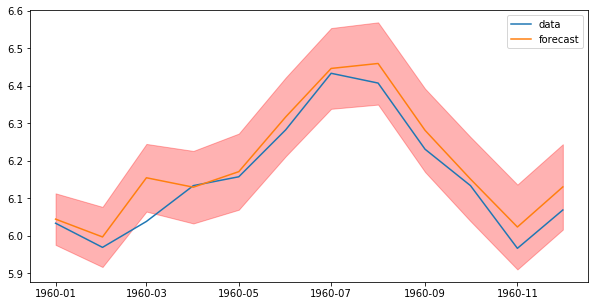

In [31]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index,\
                confint[:,0],confint[:,1],\
                color='red',alpha=0.3)
ax.legend();

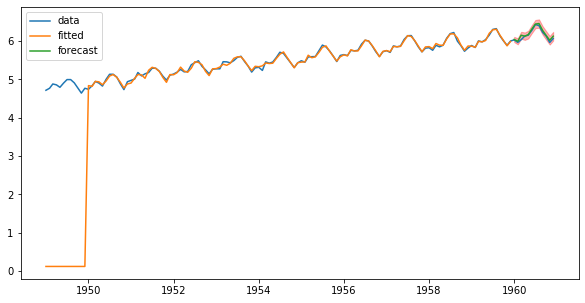

In [32]:
train_pred_log = logmodel.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index, train_pred_log, label='fitted')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index,\
                confint[:,0],confint[:,1],\
                color='red',alpha=0.3)
ax.legend();

In [33]:
### forecast RMSE
def rmse(t, y):
    return np.sqrt(np.mean((t - y)**2))

In [35]:
print("Non-logged RMSE:", rmse(test['Passengers'], test_pred))
print("Logged RMSE:", rmse(test['Passengers'], np.exp(test_pred_log)))

Non-logged RMSE: 18.53646895322675
Logged RMSE: 23.033002584832218


In [42]:
### non-seasonal
model = pm.auto_arima(train['LogPassengers'],
                      trace=True,
                      suppress_warnings=True,
                      max_p=12, max_q=2, max_order=14,
                      stepwise=False,
                      seasonal=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-211.983, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-216.493, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-214.718, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-221.069, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-216.622, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-240.135, Time=0.28 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-216.024, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-246.232, Time=0.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-246.402, Time=0.36 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-229.057, Time=0.14 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-227.139, Time=0.35 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-250.889, Time=0.33 sec
 ARIMA(5,1,0)(0,0,0)[0] i

In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:              SARIMAX(12, 1, 1)   Log Likelihood                 227.858
Date:                Tue, 14 Jun 2022   AIC                           -425.716
Time:                        19:12:17   BIC                           -382.588
Sample:                             0   HQIC                          -408.191
                                - 132                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0087      0.006      1.469      0.142      -0.003       0.020
ar.L1          0.0314      0.094      0.336      0.737      -0.152       0.215
ar.L2         -0.1284      0.068     -1.879      0.060      -0.262       0.006
ar.L3         -0.0492      0.072     -0.686      0.493      -0.190       0.091
ar.L4         -0.1204      0.075     -1.609      0.108      -0.267       0.026
ar.L5         -0.0105      0.070     -0.151      0.880      -0.147       0.126
ar.L6         -0.1014      0.069     -1.474      0.141      -0.236       0.033
ar.L7         -0.0515      0.075     -0.687      0.492      -0.198       0.095
ar.L8         -0.1594      0.068     -2.341      0.019      -0.293      -0.026
ar.L9         -0.0026      0.083     -0.032      0.975      -0.166       0.161
ar.L10        -0.1084      0.068     -1.597      0.110      -0.241       0.025
ar.L11        -0.0064      0.074     -0.086      0.931      -0.152       0.139
ar.L12         0.7671      0.065     11.744      0.000       0.639       0.895
ma.L1         -0.4027      0.127     -3.170      0.002      -0.652      -0.154
sigma2         0.0016      0.000      7.061      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 2.63
Prob(Q):                              0.82   Prob(JB):                         0.27
Heteroskedasticity (H):               0.37   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

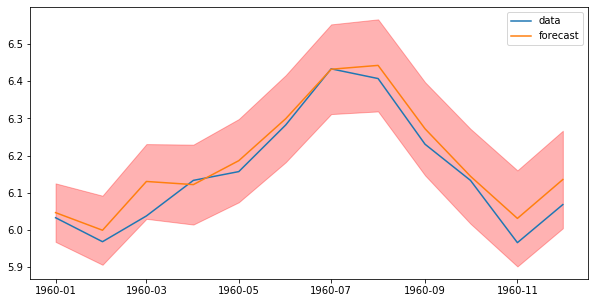

In [44]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index,
                confint[:,0], confint[:,1],
                color='red',alpha=0.3)
ax.legend();

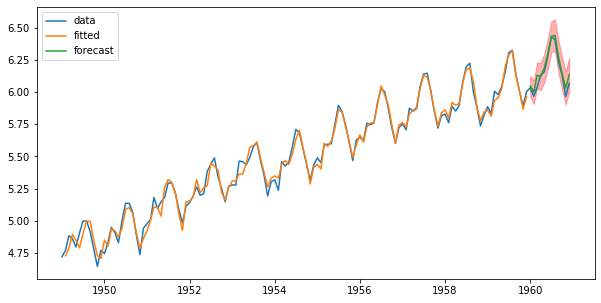

In [45]:
train_pred = model.predict_in_sample(start=1, end=-1)

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index[1:], train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index,
                confint[:,0],confint[:,1],
                color='red',alpha=0.3)
ax.legend();

In [46]:
rmse(test['Passengers'], np.exp(test_pred))

19.79347740242322